# Explore here

In [1]:
import pandas as pd


data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")

data.head()



,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [2]:
# Dimesiones

data.shape

(48895, 16)

In [3]:
# Obtener información sobre tipos de datos y valores no nulos

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Existen un total de 48895 filas  y 15 columnas.
las variables con mas cantidad de nulos son  "last_review" y "reviews_per_month".

por otra parte, tenemos:

8 características categóricas las cuales son: id, name, host_id, host_name, neighbourhood_group, neighbourhood, room_type, availability_365.
8 características numéricas las cuales son: latitude, longitude, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count.

In [4]:
# visualizar duplicado


data.drop("host_id", axis = 1).duplicated().sum()


np.int64(0)

In [5]:
# Eliminar información irrelevante


data.drop(["id", "name", "host_name"], axis = 1, inplace = True)
data.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


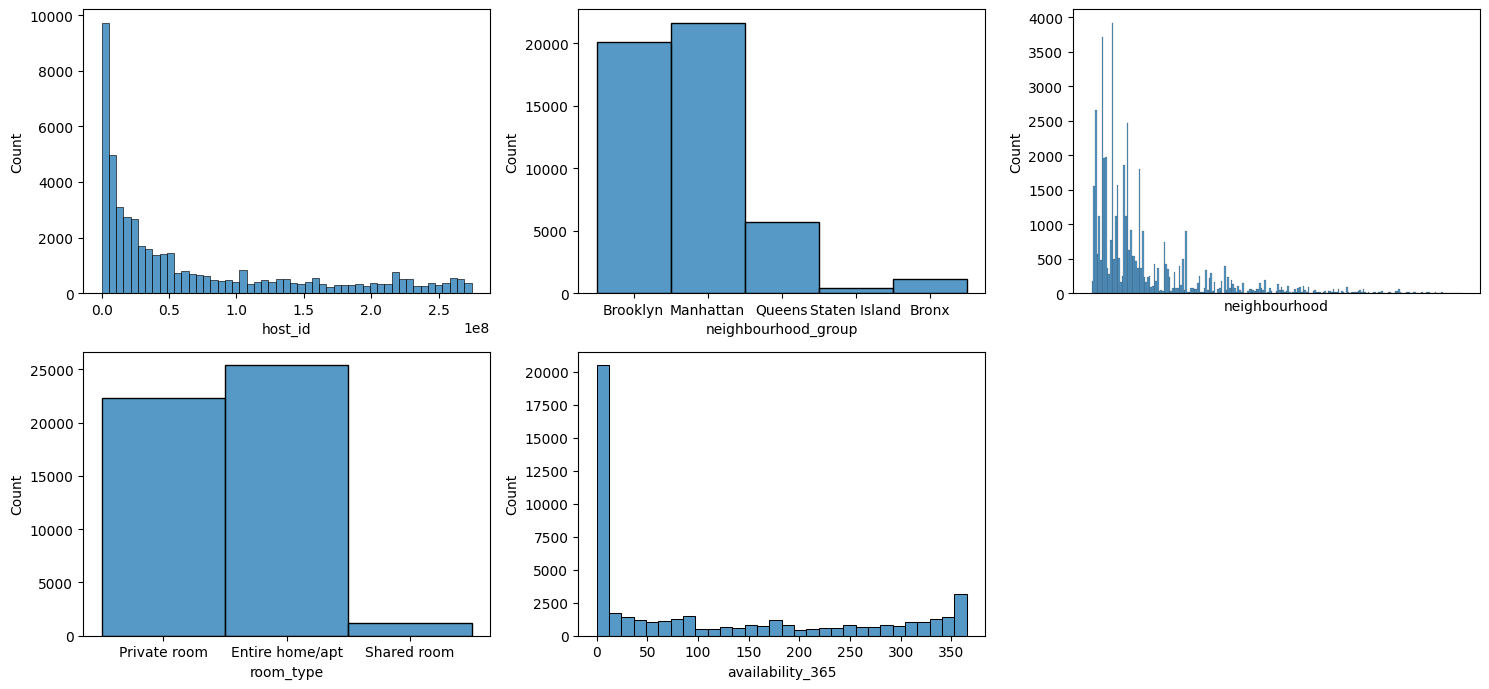

In [6]:
# Análisis sobre variables categóricas


import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(2, 3, figsize=(15, 7))

# Create Histogram
sns.histplot(ax = axis[0,0], data = data, x = "host_id")
sns.histplot(ax = axis[0,1], data = data, x = "neighbourhood_group")
sns.histplot(ax = axis[0,2], data = data, x = "neighbourhood").set_xticks([])
sns.histplot(ax = axis[1,0], data = data, x = "room_type")
sns.histplot(ax = axis[1,1], data = data, x = "availability_365")
fig.delaxes(axis[1, 2])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()


Host_id: podemos observar que tenemos anfitiones con varias propiedades para alquilar.

neighbourhood_group: nos muestra que efectivamente estamos trabajando solo con datos de la ciudad de New York ya que solo nos muestra informacion de las 5 areas que lo conforman.

neighbourhood: nos muestra que tenemos mas disponibilidad para alquiler en unos barrios que en otros.

room_type: la mayor cantidad de ofertas para alquilar son casas/apartamentos completos, siguiedole muy de cerca habitaciones privadas y quedando muy por detras habitaciones compartidas pero aunn asi se pueden encontrar algunas.

availability_365: nos encontramos que la mayoria de las propiedades se encuentran disponibles los 365 dias del año en su ayoria.

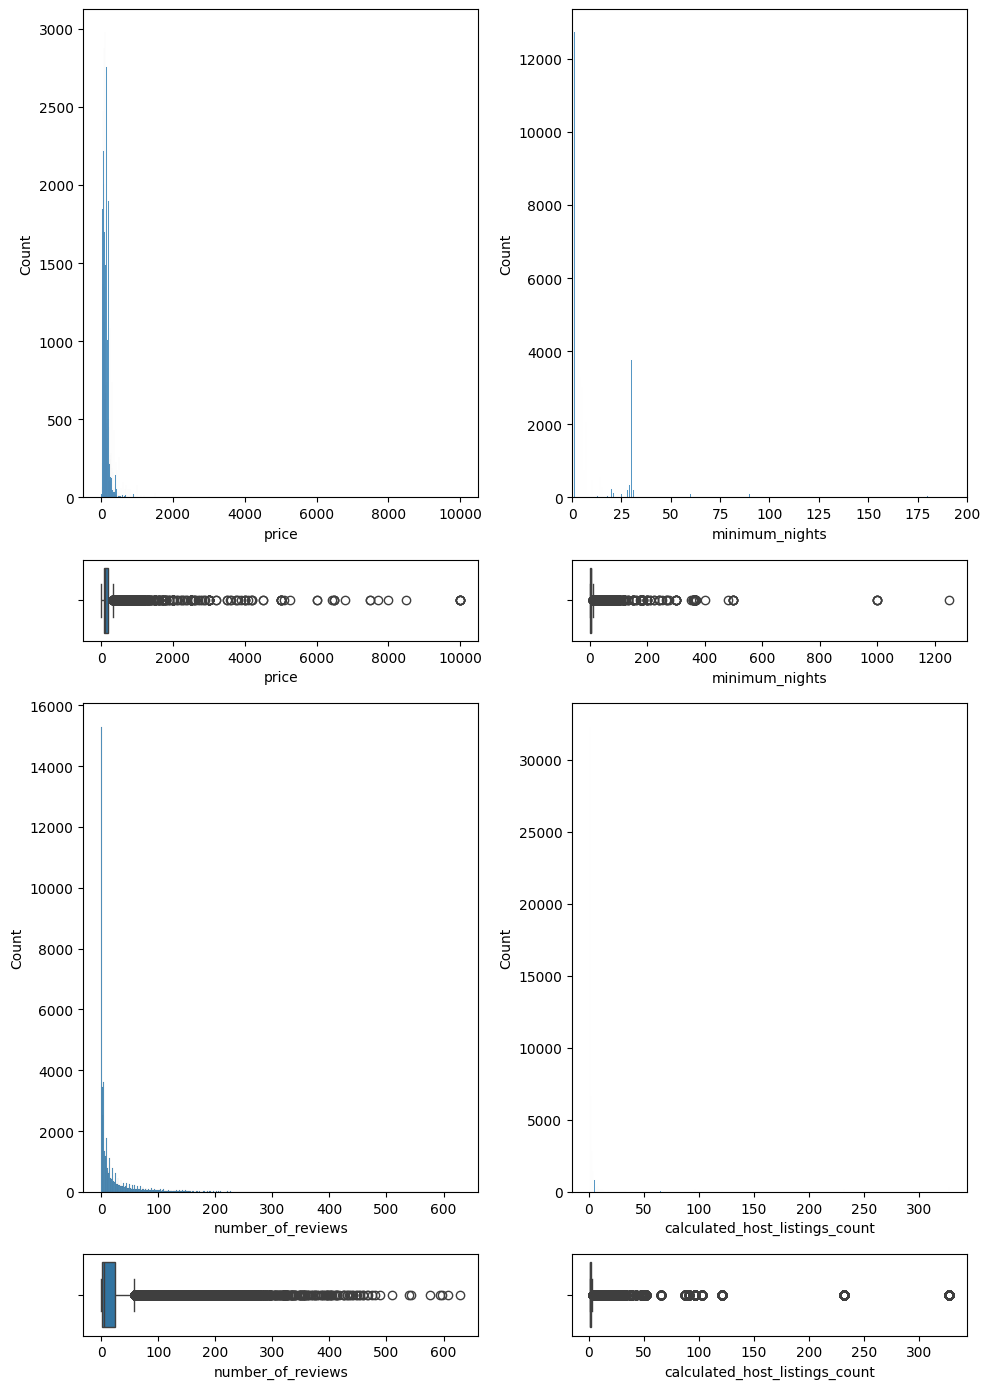

In [7]:
fig, axis = plt.subplots(4, 2, figsize = (10, 14), gridspec_kw = {"height_ratios": [6, 1, 6, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = data, x = "price")
sns.boxplot(ax = axis[1, 0], data = data, x = "price")

sns.histplot(ax = axis[0, 1], data = data, x = "minimum_nights").set_xlim(0, 200)
sns.boxplot(ax = axis[1, 1], data = data, x = "minimum_nights")

sns.histplot(ax = axis[2, 0], data = data, x = "number_of_reviews")
sns.boxplot(ax = axis[3, 0], data = data, x = "number_of_reviews")

sns.histplot(ax = axis[2, 1], data = data, x = "calculated_host_listings_count")
sns.boxplot(ax = axis[3, 1], data = data, x = "calculated_host_listings_count")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

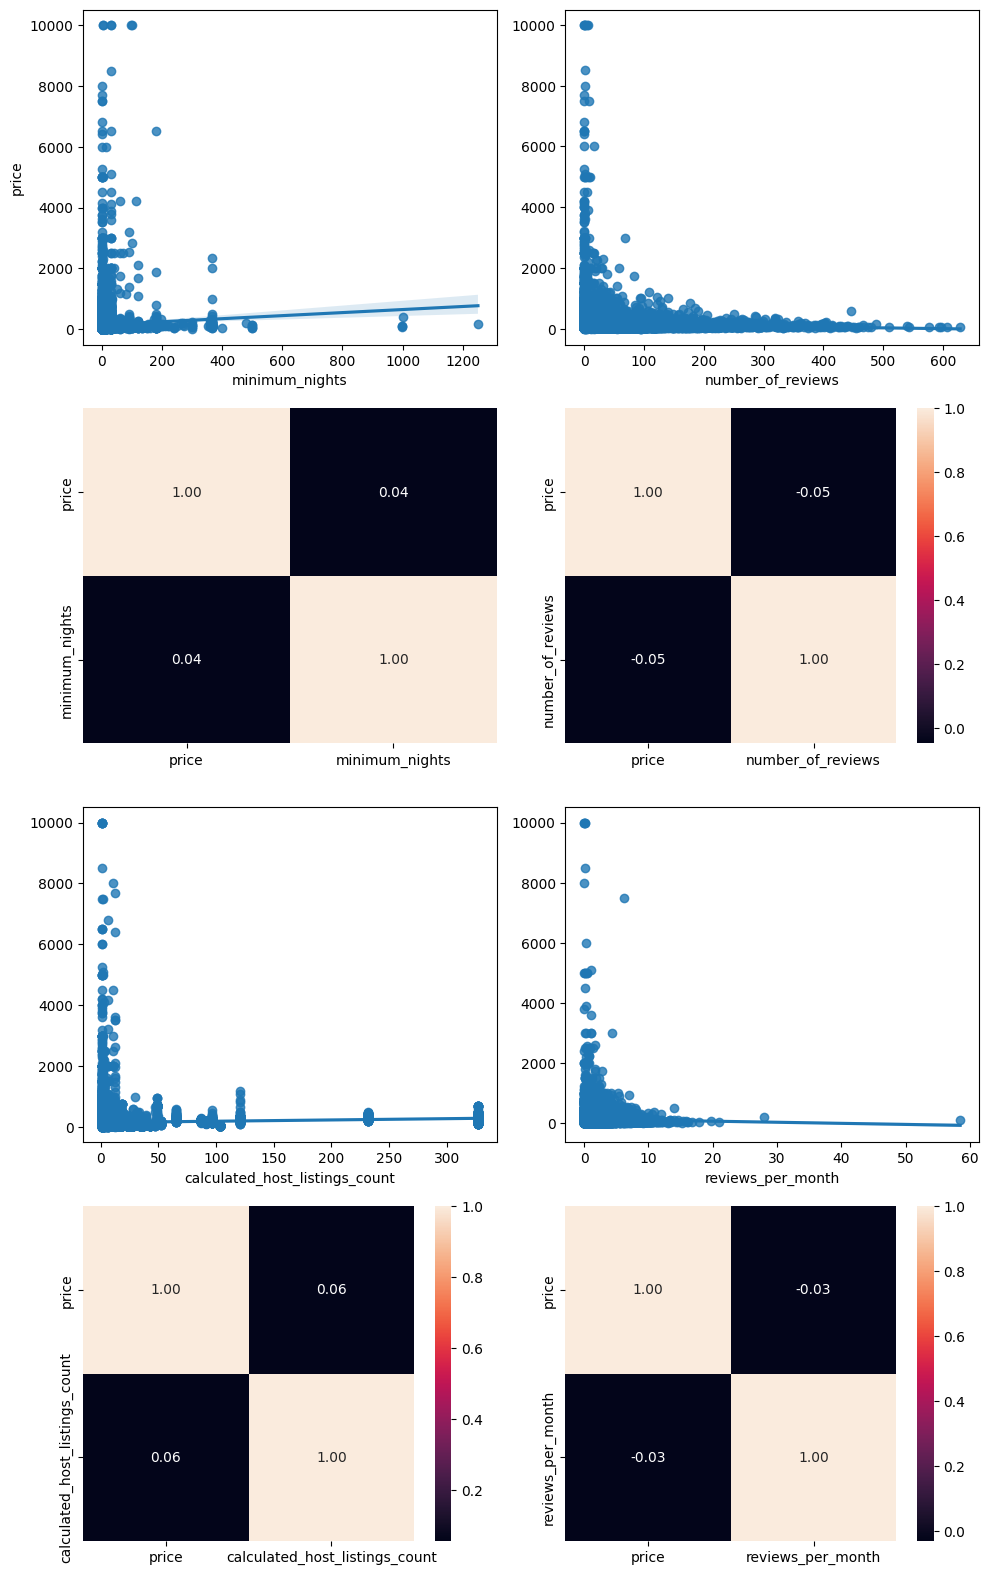

In [8]:
fig, axis = plt.subplots(4, 2, figsize = (10, 16))

sns.regplot(ax = axis[0, 0], data = data, x = "minimum_nights", y = "price")
sns.heatmap(data[["price", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = data, x = "number_of_reviews", y = "price").set(ylabel = None)
sns.heatmap(data[["price", "number_of_reviews"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[2, 0], data = data, x = "calculated_host_listings_count", y = "price").set(ylabel = None)
sns.heatmap(data[["price", "calculated_host_listings_count"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0]).set(ylabel = None)


sns.regplot(ax=axis[2, 1], data=data, x="reviews_per_month", y="price").set(ylabel=None)
sns.heatmap(data[["price", "reviews_per_month"]].corr(), annot=True, fmt=".2f", ax=axis[3, 1]).set(ylabel=None)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


Se puede visualizar en las graficas que no existe correlacion entre las variables numericas vitas en comparacion con el precio.

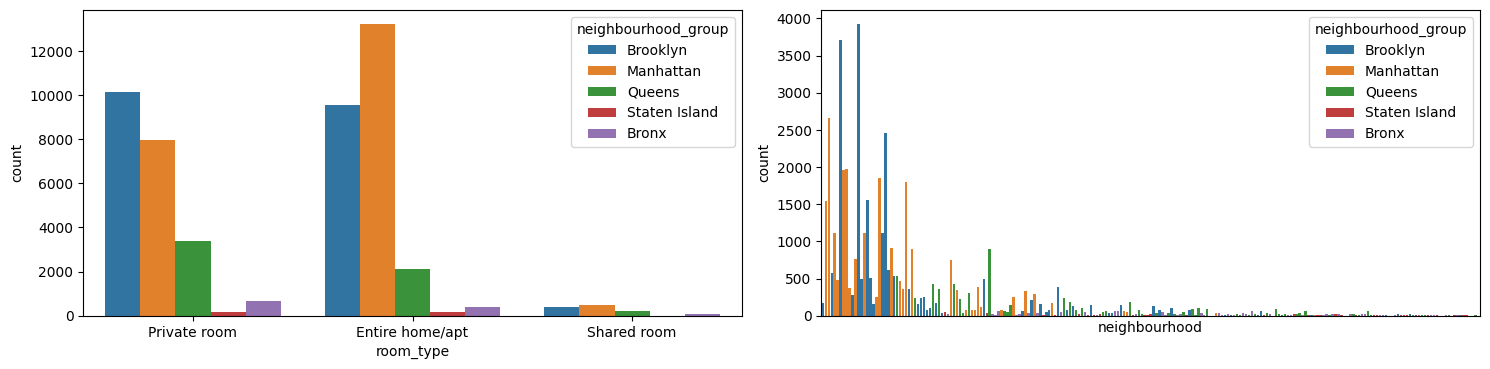

In [9]:
fig, axis = plt.subplots(2, 2, figsize = (15, 7))

sns.countplot(ax = axis[0, 0], data = data, x = "room_type", hue = "neighbourhood_group")
sns.countplot(ax = axis[0, 1], data = data, x = "neighbourhood", hue = "neighbourhood_group").set_xticks([])

fig.delaxes(axis[1, 0])
fig.delaxes(axis[1, 1])

plt.tight_layout()


plt.show()

En el grafico de la izquierda podemos observar que "Entire home/apt" es el tipo de habitación más frecuente en Manhattan y Brooklyn, mientras que las "Private room" también son muy comunes en Brooklyn. Las "Shared room" son significativamente menos comunes en todos los grupos.
en base a esto podemos decir que no hay gran relevancia entre el tipo de habitacion y el barrio.

El grafico de la derecha se puede inferir que los picos más altos corresponden a vecindarios en Brooklyn y Manhattan, lo que refuerza la observación del primer gráfico sobre la dominancia de estos grupos en la oferta de alojamiento. La oferta de alojamientos no está distribuida uniformemente entre los vecindarios; en cambio, se concentra en áreas específicas dentro de los grupos de vecindarios más grandes como Brooklyn y Manhattan.



In [ ]:
fig, axis = plt.subplots(figsize = (10, 5), ncols = 2)

sns.barplot(ax = axis[0], data = data, x = "room_type", y = "price", hue = "neighbourhood_group")
sns.barplot(ax = axis[1], data = data, x = "calculated_host_listings_count", y = "number_of_reviews", hue = "neighbourhood_group").set(ylabel = None)


plt.tight_layout()

plt.show()

SyntaxError: positional argument follows keyword argument (141239640.py, line 4)

En el grafico de la izquierda observamos que los tipos de habitaciones más comunes cambian bastante según el vecindario y su grupo. Por ejemplo, en zonas de "Manhattan" hay muchas casas o apartamentos completos, En cambio, en "Brooklyn", aunque también hay apartamentos enteros. Las habitaciones compartidas no son tan habituales en estas zonas.

El gráfico de la derecha muestra que, por lo general, a más propiedades que tiene un anfitrión, más reseñas suele recibir. Esto tiene sentido, ya que más propiedades significan más posibilidades de que los huéspedes dejen una opinión. Sin embargo, esta relación no es igual en todos los grupos de vecindarios. Por ejemplo, en "Manhattan", parece que se consiguen bastantes reseñas incluso sin tener muchísimas propiedades, mientras que en "Brooklyn", el número de reseñas puede ser un poco menor si lo comparamos con la cantidad de propiedades que tienen los anfitriones.

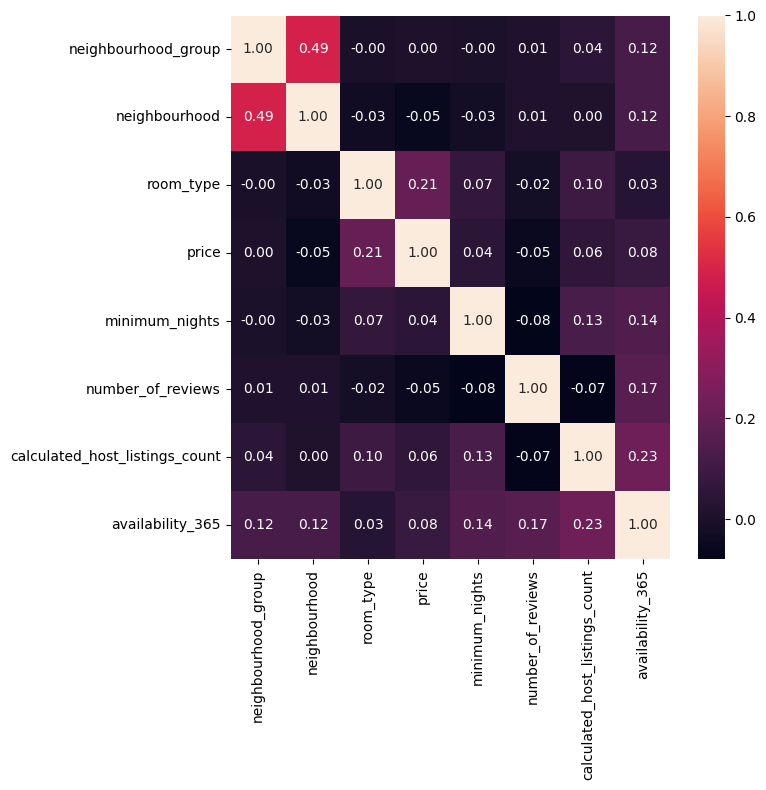

In [11]:
data["room_type"] = pd.factorize(data["room_type"])[0]
data["neighbourhood_group"] = pd.factorize(data["neighbourhood_group"])[0]
data["neighbourhood"] = pd.factorize(data["neighbourhood"])[0]

fig, axes = plt.subplots(figsize=(8, 8))

sns.heatmap(data[["neighbourhood_group", "neighbourhood", "room_type", "price", "minimum_nights",	
                        "number_of_reviews", "calculated_host_listings_count", "availability_365"]].corr(), annot = True, fmt = ".2f")


plt.tight_layout()

# Draw Plot
plt.show()

El mapa de calor muestra la relación entre números en los datos y vemos que los anfitriones con más propiedades suelen tener más reseñas, pero la mayoría de las otras variables numéricas, como el precio, tienen poca relación entre sí.

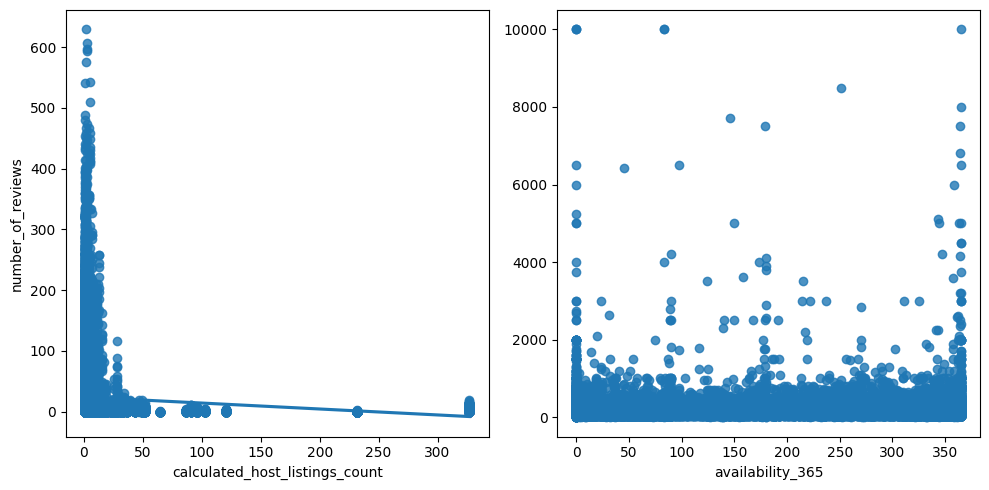

In [12]:
fig, axis = plt.subplots(figsize = (10, 5), ncols = 2)

sns.regplot(ax = axis[0], data = data, x = "calculated_host_listings_count", y = "number_of_reviews")
sns.regplot(ax = axis[1], data = data, x = "availability_365", y = "price").set(ylabel = None)

plt.tight_layout()

plt.show()

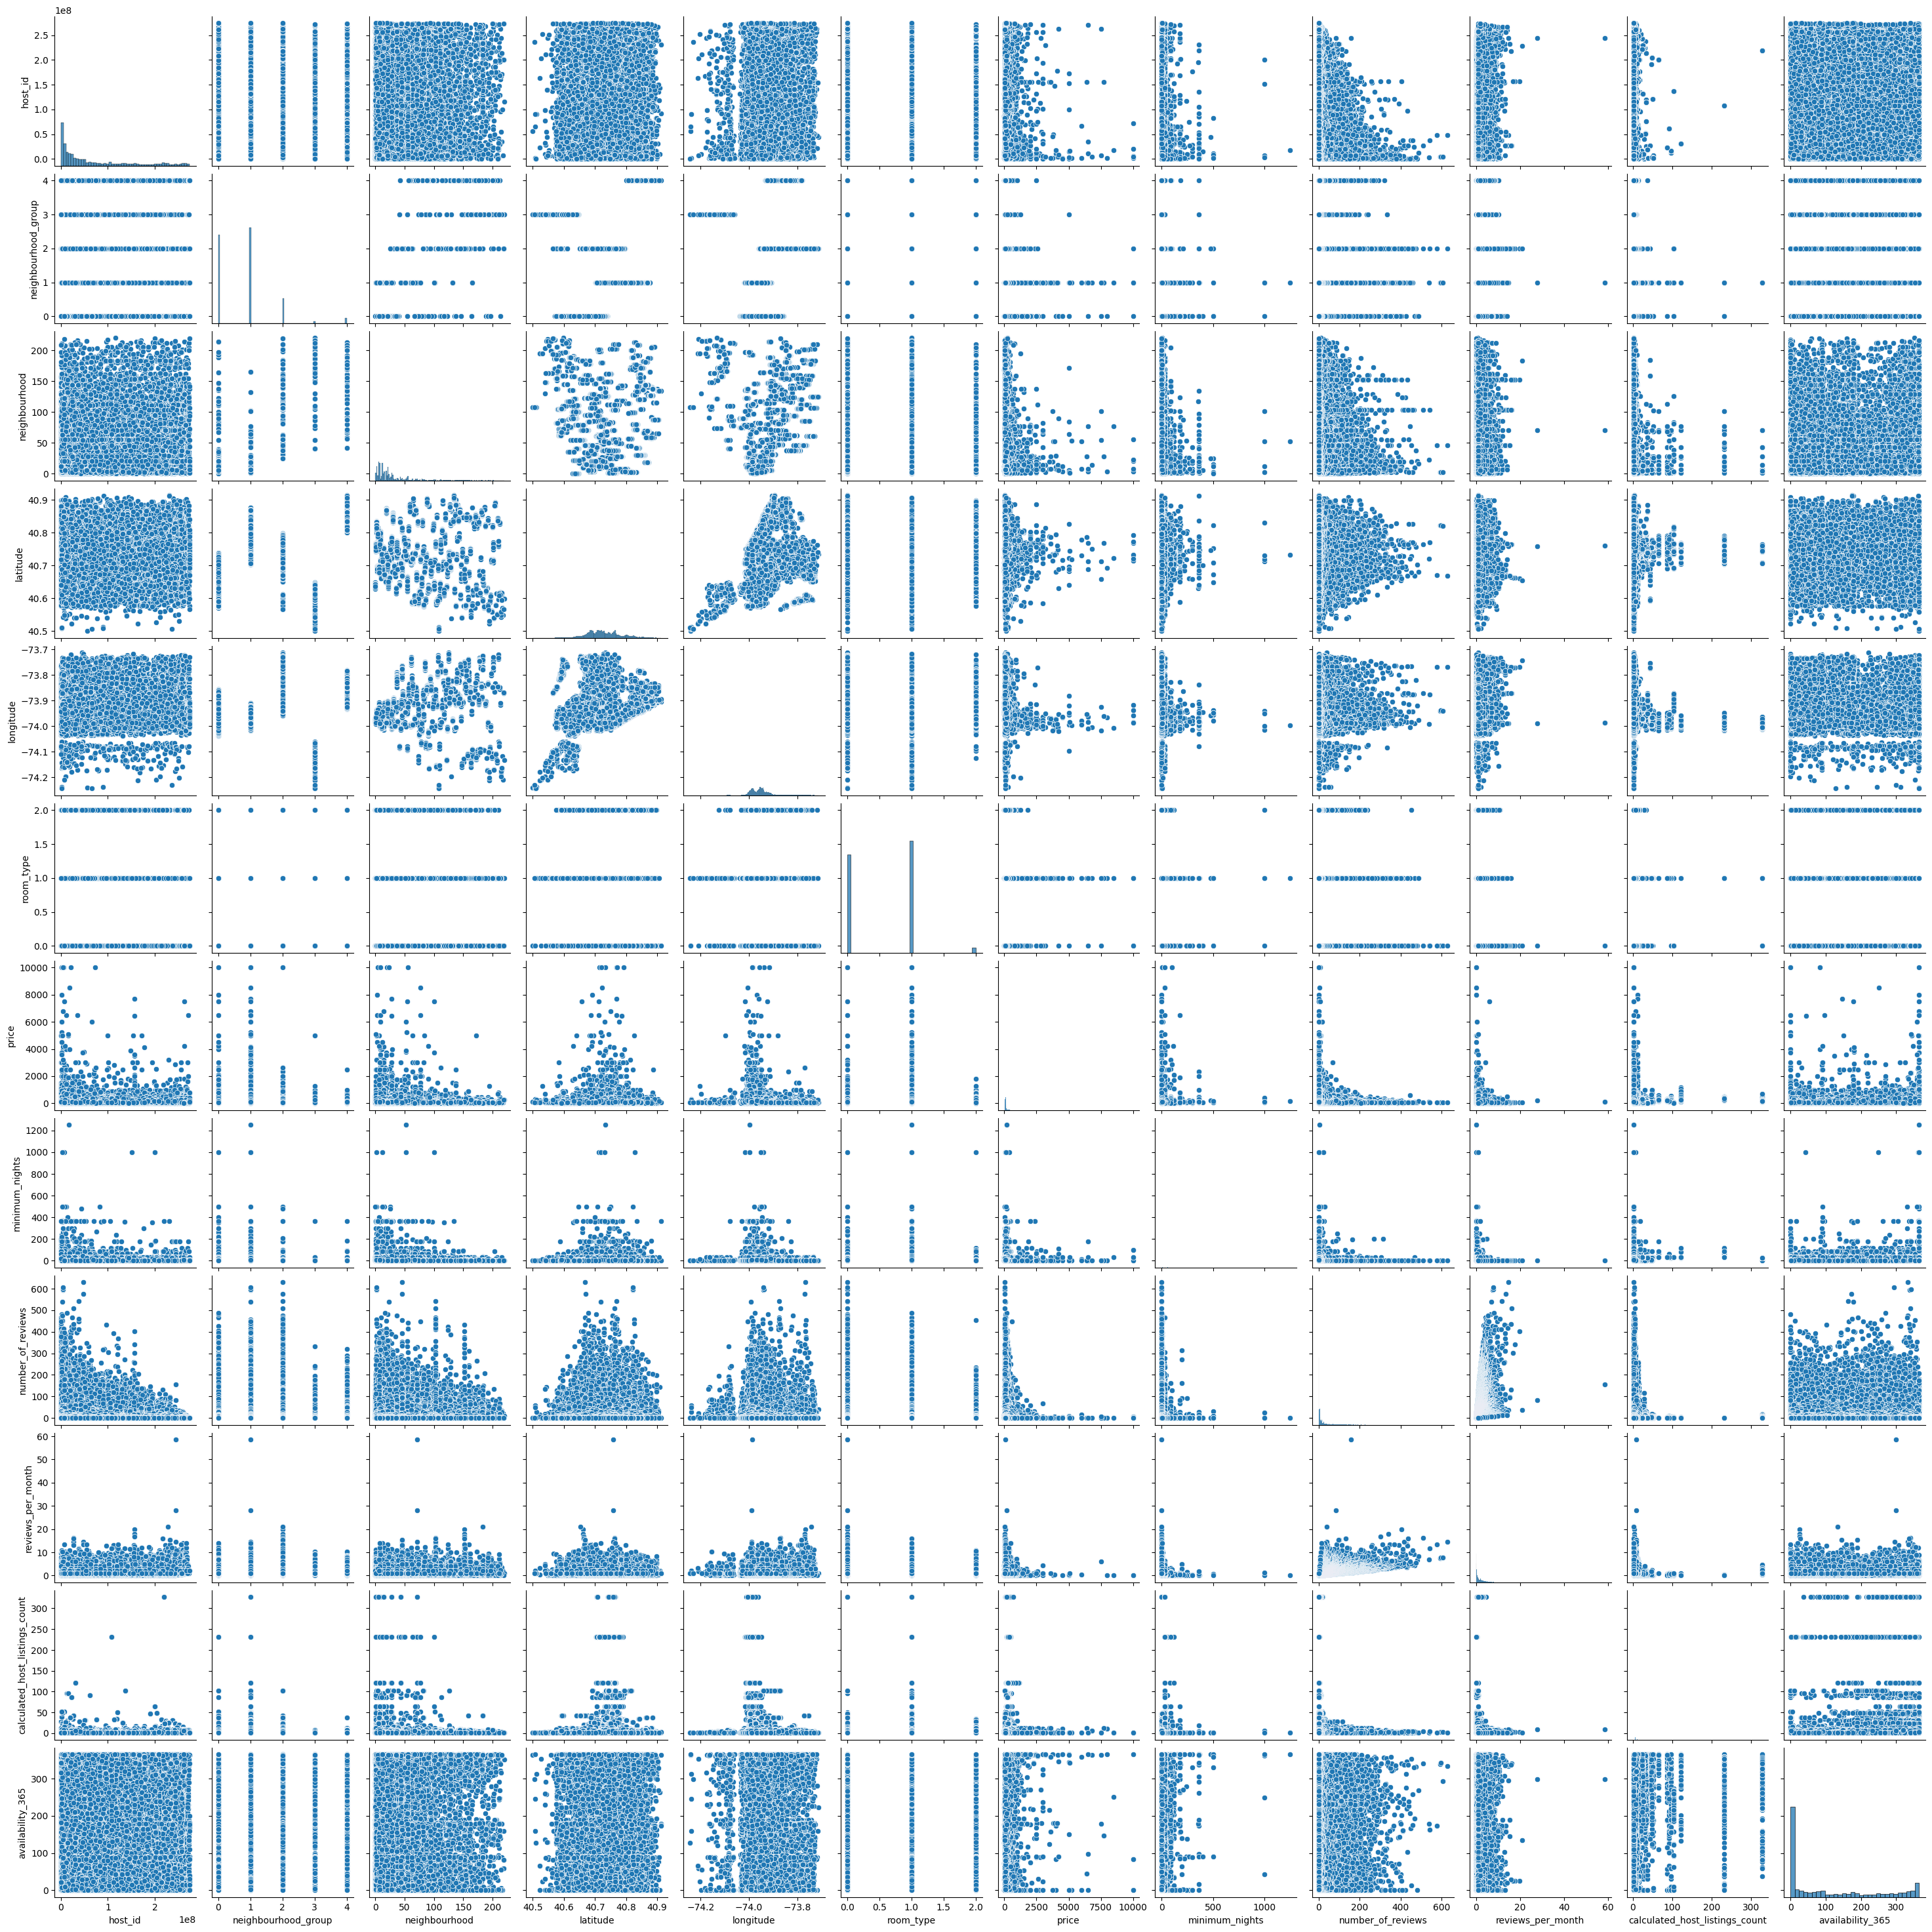

In [13]:
sns.pairplot(data = data)

In [14]:
data.describe()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,6.762001e+07,0.786911,29.888782,40.728949,-73.952170,0.567113,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,7.861097e+07,0.844386,34.676634,0.054530,0.046157,0.541249,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.438000e+03,0.000000,0.000000,40.499790,-74.244420,0.000000,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,7.822033e+06,0.000000,7.500000,40.690100,-73.983070,0.000000,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,3.079382e+07,1.000000,19.000000,40.723070,-73.955680,1.000000,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,1.074344e+08,1.000000,37.000000,40.763115,-73.936275,1.000000,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,2.743213e+08,4.000000,220.000000,40.913060,-73.712990,2.000000,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


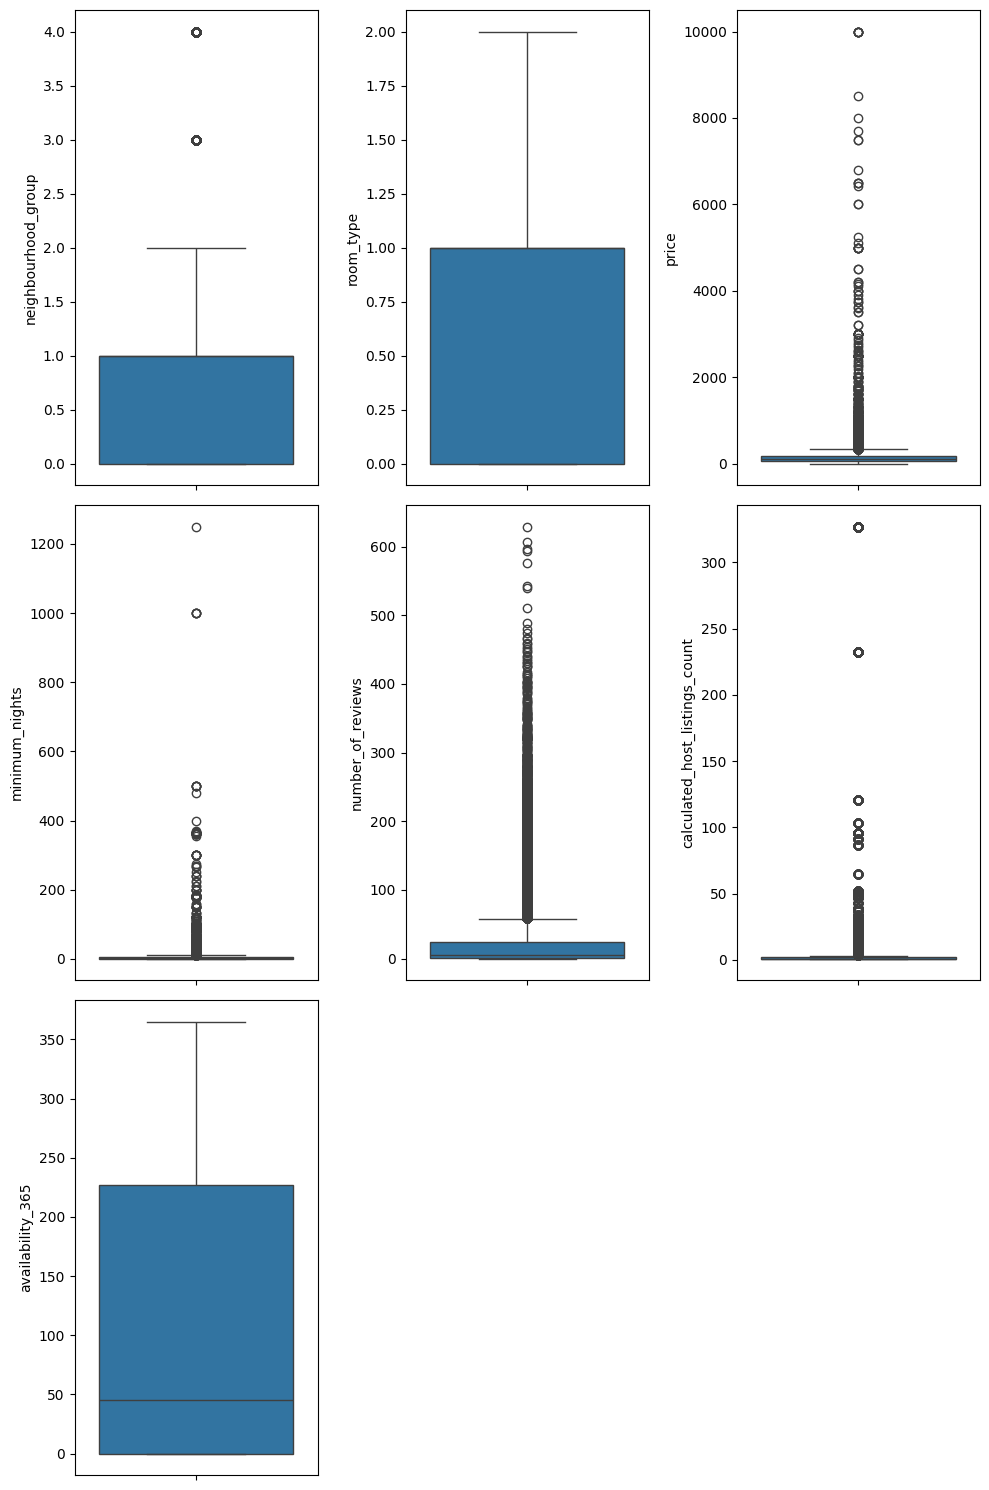

In [15]:
fig, axes = plt.subplots(3, 3, figsize = (10, 15))

sns.boxplot(ax = axes[0, 0], data = data, y = "neighbourhood_group")
sns.boxplot(ax = axes[0, 1], data = data, y = "room_type")
sns.boxplot(ax = axes[0, 2], data = data, y = "price")
sns.boxplot(ax = axes[1, 0], data = data, y = "minimum_nights")
sns.boxplot(ax = axes[1, 1], data = data, y = "number_of_reviews")
sns.boxplot(ax = axes[1, 2], data = data, y = "calculated_host_listings_count")
sns.boxplot(ax = axes[2, 0], data = data, y = "availability_365")
fig.delaxes(axes[2, 1])
fig.delaxes(axes[2, 2])

plt.tight_layout()

plt.show()

In [16]:
#total_stats = data[["price", "minimum_nights", "number_of_reviews", "calculated_host_listings_count"]].describe()
#total_stats

In [17]:
#for columna in total_stats.columns:
 #   q1 = total_stats.loc["25%", columna]
 #   q3 = total_stats.loc["75%", columna]
 #   total_iqr = q3 - q1

 #   upper_limit = q3 + 1.5 * total_iqr
 #   lower_limit = q1 - 1.5 * total_iqr

    
 #   if lower_limit < 0:
  #      lower_limit = 0

 #   print(f"\n--- Columna: {columna} ---")
  #  print(f"  Límite Superior para outliers: {round(upper_limit, 2)}")
  #  print(f"  Límite Inferior para outliers: {round(lower_limit, 2)}")
  #  print(f"  Rango Intercuartílico (IQR): {round(total_iqr, 2)}")

#print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(total_iqr, 2)}")

In [18]:
price_stats = data["price"].describe()
price_stats

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [19]:
price_iqr = price_stats["75%"] - price_stats["25%"]
upper_limit = price_stats["75%"] + 1.5 * price_iqr
lower_limit = price_stats["25%"] - 1.5 * price_iqr

print(f"Los límites superior e inferior para encontrar valores atípicos son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartil de {round(price_iqr, 2)}")

Los límites superior e inferior para encontrar valores atípicos son 334.0 y -90.0, con un rango intercuartil de 106.0


In [20]:
data = data[data["price"] > 0]

In [21]:
nights_stats = data["minimum_nights"].describe()
nights_stats

count    48884.000000
mean         7.029887
std         20.512224
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [22]:
nights_iqr = nights_stats["75%"] - nights_stats["25%"]
upper_limit = nights_stats["75%"] + 1.5 * nights_iqr
lower_limit = nights_stats["25%"] - 1.5 * nights_iqr

print(f"Los límites superior e inferior para encontrar valores atípicos son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartil de {round(nights_iqr, 2)}")

Los límites superior e inferior para encontrar valores atípicos son 11.0 y -5.0, con un rango intercuartil de 4.0


In [23]:
data = data[data["minimum_nights"] <= 15]

In [24]:
review_stats = data["number_of_reviews"].describe()
review_stats

count    43265.000000
mean        25.211950
std         46.292011
min          0.000000
25%          1.000000
50%          6.000000
75%         27.000000
max        629.000000
Name: number_of_reviews, dtype: float64

In [25]:
review_iqr = review_stats["75%"] - review_stats["25%"]
upper_limit = review_stats["75%"] + 1.5 * review_iqr
lower_limit = review_stats["25%"] - 1.5 * review_iqr

print(f"Los límites superior e inferior para encontrar valores atípicos son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartil de {round(nights_iqr, 2)}")

Los límites superior e inferior para encontrar valores atípicos son 66.0 y -38.0, con un rango intercuartil de 4.0


In [26]:
data = data[data["number_of_reviews"] > 4]

In [27]:
hostlist_stats = data["calculated_host_listings_count"].describe()
hostlist_stats

count    23937.000000
mean         3.850107
std         24.178042
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64

In [28]:

hostlist_iqr = hostlist_stats["75%"] - hostlist_stats["25%"]
upper_limit = hostlist_stats["75%"] + 1.5 * hostlist_iqr
lower_limit = hostlist_stats["25%"] - 1.5 * hostlist_iqr

print(f"Los límites superior e inferior para encontrar valores atípicos son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartil de {round(nights_iqr, 2)}")

Los límites superior e inferior para encontrar valores atípicos son 3.5 y -0.5, con un rango intercuartil de 4.0


In [29]:
data = data[data["calculated_host_listings_count"] > 4]

In [30]:
data_CON_outliers = data.copy()

data_SIN_outliers = data.copy()
# Para cada una de las variables con outliers en mi problema, tengo que reemplazar sus valores del DF

def replace_outliers_from_column(column, df):
  column_stats = df[column].describe()
  column_iqr = column_stats["75%"] - column_stats["25%"]
  upper_limit = column_stats["75%"] + 1.5 * column_iqr
  lower_limit = column_stats["25%"] - 1.5 * column_iqr
  if lower_limit < 0: lower_limit = min(df[column])
  # Remove upper outliers
  df[column] = df[column].apply(lambda x: x if (x <= upper_limit) else upper_limit)
  # Remove lower outliers
  df[column] = df[column].apply(lambda x: x if (x >= lower_limit) else lower_limit)
  return df.copy(), [lower_limit, upper_limit]

outliers_dict = {}
for column in ["price", "minimum_nights", "number_of_reviews", "calculated_host_listings_count"]:
  data_SIN_outliers, limit_list = replace_outliers_from_column(column, data_SIN_outliers)
  outliers_dict[column] = limit_list

outliers_dict

{'price': [19, np.float64(297.5)],
 'minimum_nights': [1, np.float64(3.5)],
 'number_of_reviews': [5, np.float64(122.5)],
 'calculated_host_listings_count': [5, np.float64(20.0)]}

In [31]:
data_CON_outliers

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,0,0,40.64749,-73.97237,0,149,1,9,2018-10-19,0.21,6,365
21,22486,0,16,40.68069,-73.97706,0,130,2,130,2019-07-01,1.09,6,347
22,22486,0,16,40.67989,-73.97798,0,80,1,39,2019-01-01,0.37,6,364
23,22486,0,16,40.68001,-73.97865,0,110,2,71,2019-07-02,0.61,6,304
92,51038,0,3,40.68634,-73.96600,0,98,7,16,2019-05-31,0.20,6,185
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46385,253906467,1,7,40.76578,-73.99101,2,85,1,6,2019-06-28,5.62,9,175
46577,264043510,2,152,40.66292,-73.76242,0,70,1,5,2019-07-07,4.29,6,365
46905,243367528,2,56,40.76599,-73.91225,0,100,1,9,2019-07-01,9.00,7,253
47000,263504959,2,129,40.69158,-73.86578,0,50,1,6,2019-07-06,6.00,8,273


In [32]:
data_SIN_outliers

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,0,0,40.64749,-73.97237,0,149.0,1.0,9.0,2018-10-19,0.21,6.0,365
21,22486,0,16,40.68069,-73.97706,0,130.0,2.0,122.5,2019-07-01,1.09,6.0,347
22,22486,0,16,40.67989,-73.97798,0,80.0,1.0,39.0,2019-01-01,0.37,6.0,364
23,22486,0,16,40.68001,-73.97865,0,110.0,2.0,71.0,2019-07-02,0.61,6.0,304
92,51038,0,3,40.68634,-73.96600,0,98.0,3.5,16.0,2019-05-31,0.20,6.0,185
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46385,253906467,1,7,40.76578,-73.99101,2,85.0,1.0,6.0,2019-06-28,5.62,9.0,175
46577,264043510,2,152,40.66292,-73.76242,0,70.0,1.0,5.0,2019-07-07,4.29,6.0,365
46905,243367528,2,56,40.76599,-73.91225,0,100.0,1.0,9.0,2019-07-01,9.00,7.0,253
47000,263504959,2,129,40.69158,-73.86578,0,50.0,1.0,6.0,2019-07-06,6.00,8.0,273
